# Mean and standard deviation

**Problem 3a.** In this problem we look at the mean and the standard deviation from a more statistical point of view.
 * Generate $N=1\,000$ values $x_1,\ldots,x_n$ from Poisson($\lambda$) distribution for $\lambda=10$. You might want to use the function **poisson(lambda,shape)** from package **numpy.random**.
 * Plot a histogram of these values. What is the mean of Poisson($\lambda$)? What is the standard deviation? Are these values a good description of what you see in the histogram?
 * For $i \in \{1,\ldots,n\}$ compute $\bar{x}_i = \frac{x_1+\ldots+x_i}{i}$. Plot the values of $\bar{x}_i$.
 * On the same figure, plot a horizontal line corresponding to the expected value ($\lambda$) of all those averages.
 * Compute (analitically) the standard deviation $\sigma_i$ of the $i$-th average and plot lines $\lambda \pm \sigma_i$, again on the same figure.
 * Does the standard deviation accurately describe the *typical* deviations?

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

n = 1000
lmbd = 10

p = np.random.poisson(lmbd, n)

plt.hist(p, bins=range(min(p), max(p) + 1, 1))
plt.show()

mean = np.mean(p)
std = np.std(p)
print("mean is {}, standard deviation is {}".format(mean, std))



<Figure size 640x480 with 1 Axes>

mean is 9.841, standard deviation is 3.2890301002


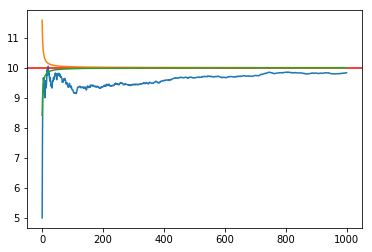

In [2]:
lmbd_sqrt = np.sqrt(lmbd)
i = np.arange(1, n + 1, 1, dtype='f')

x_dash = np.cumsum(p) / (i + 1)
std_dash = np.full_like(i, lmbd_sqrt) / (i + 1)
    
plt.plot(x_dash)
plt.axhline(y=lmbd, color='red')
plt.plot(map(lambda x: lmbd + x, std_dash))
plt.plot(map(lambda x: lmbd - x, std_dash))


plt.show()

**Problem 3b.** In this task we consider a discrete distribution *without a mean* and verify whether we can still estimate the location of its peak by simply computing averages. Consider a discrete variable $X$ with the following distribution: $P(X=k) = \frac{1}{4|k|(|k|+1)}$ for $k \neq 0$ and $P(X=0) = \frac{1}{2}$. 
 * Argue that these formulas indeed describe a discrete distribution.
 * Show that $X$ does not have a mean.
 * Plot the function $f(k) = P(X=k)$ for $k \in [-10,10]$.
 * Write a function that samples from $X$'s distribution (imaginary bonus points if it is vectorized).
 * Generate $N=10\,000$ values $x_1,\ldots,x_n$ from the distribution.
 * For $i \in \{1,\ldots,n\}$ compute $\bar{x}_i = \frac{x_1+\ldots+x_i}{i}$. 
 * Plot the values of $\bar{x}_i$. Does it look like the series converges? If it is not clear, you can compute several independent
   $N$-means and plot a histogram, then increase $N$ significantly and see how it changes.
 * For $i \in \{1,\ldots,n\}$ compute $\hat{x}_i = \textrm{ median of }\{x_1,\ldots,x_i\}$. 
   You do not need to do it in a clever way (like in ASD lab).
 * Plot the values of $\hat{x}_i$. Does it look like the series converges? 
 * A more interesting situation would be the one where you a given a distribution like $X+c$ for unknown $c$, and 
   want to figure out what $c$ is, i.e. find the center of the distribution. Both methods above attempt to
   locate the center - which works better?

**Problem 3c.** We are now going to investigate an intermediate case - a variable with a finite mean, but no variance. Consider a discrete variable $Y$ with the following distribution: $P(Y=k) = \frac{1}{|k|(|k|+1)(|k|+2)}$ for $k \neq 0$ and $P(Y=0) = \frac{1}{2}$. 
 * Argue that these formulas indeed describe a discrete distribution.
 * Show that $EY=0$, but $Y$ has no variation (i.e. the defining series is not absolutely convergent).
 * Plot the function $f(k) = P(Y=k)$ for $k \in [-10,10]$.
 * Write a function that samples from $Y$'s distribution.
 * Generate $N=10\,000$ values $y_1,\ldots,y_n$ from the distribution.
 * For $i \in \{1,\ldots,n\}$ compute $\bar{y}_i = \frac{y_1+\ldots+y_i}{i}$. 
 * Plot the values of $\bar{y}_i$. Does it look like the series converges?
 * For $i \in \{1,\ldots,n\}$ compute $\hat{y}_i = \textrm{ median of }\{y_1,\ldots,y_i\}$.
 * Plot the values of $\hat{y}_i$.
 * Discuss the results obtained.

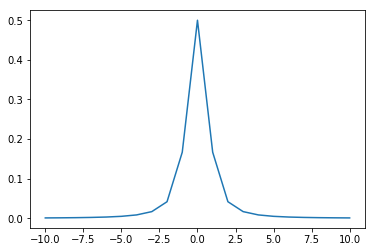

In [3]:
f = np.vectorize(lambda k: 0.5 if k == 0 else float(1)/(np.absolute(k)*(np.absolute(k) + 1)*(np.absolute(k) + 2)))

n = np.arange(-10, 11, 1)
plt.plot(n, f(n))


In [4]:
def sample():
    choice = np.random.choice(a=[-1, 0, 1], p=[0.25, 0.5, 0.25])
    if (choice == 0):
        return 0
    
    x = np.random.uniform(0, 1)
    a = 2 / x
    k = np.floor(np.sqrt(a)) - 2
        
    while ((k + 1)*(k + 2) < a):
        k += 1
    res = k
        
    return choice * int(res)

Counter({-52: 1,
         -37: 1,
         -31: 1,
         -30: 2,
         -29: 1,
         -28: 1,
         -26: 1,
         -25: 1,
         -23: 1,
         -21: 1,
         -19: 2,
         -18: 2,
         -17: 4,
         -16: 4,
         -15: 4,
         -13: 1,
         -12: 5,
         -11: 5,
         -10: 9,
         -9: 10,
         -8: 16,
         -7: 19,
         -6: 47,
         -5: 54,
         -4: 81,
         -3: 167,
         -2: 387,
         -1: 1744,
         0: 4911,
         1: 1669,
         2: 395,
         3: 179,
         4: 86,
         5: 58,
         6: 31,
         7: 25,
         8: 14,
         9: 16,
         10: 8,
         11: 4,
         12: 2,
         13: 2,
         15: 5,
         16: 3,
         17: 1,
         18: 4,
         19: 3,
         21: 1,
         23: 1,
         24: 1,
         25: 1,
         28: 2,
         30: 1,
         36: 1,
         41: 1,
         55: 1,
         60: 1,
         78: 1})

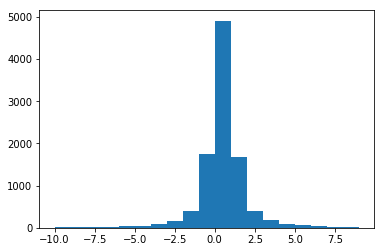

In [5]:
N = 10**4
n = np.arange(1, N + 1, 1)

f = np.vectorize(lambda x: sample())
y = f(n)

plt.hist(y, bins=range(-10, 10))
import collections
collections.Counter(y)

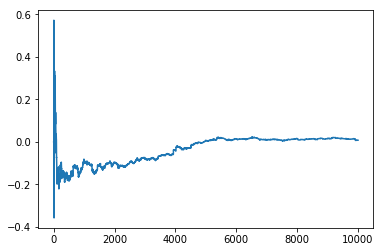

In [6]:
y_dash = np.cumsum(y) / np.arange(1, N + 1, 1, dtype='f')
plt.plot(n, y_dash)

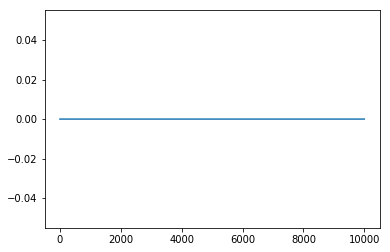

In [7]:
y_median = [np.median(y[:i]) for i in n]
plt.plot(n, y_median)